## X-ray Analysis
Next, let's try using the X-ray analysis portion of the package

In [1]:
import context

from G4EPP import XrayAnalysis

import matplotlib.pyplot as plt

X-ray response from a precipitation event with the following characterisitics:

- Energy: 1000 keV monoenergetic beam


- Flux: 10$^4$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$ 

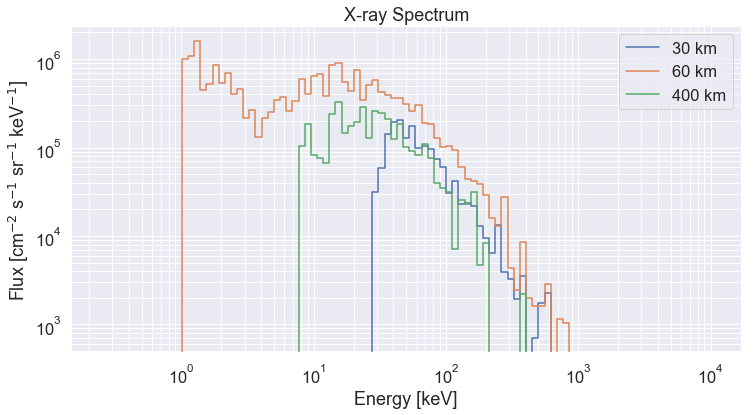

In [2]:
X = XrayAnalysis();

plt.figure(figsize=(12,6))
X.getXraysAtAltitude(energyDist="mono", energy=1000, flux=1e4, altitude=30 );
X.getXraysAtAltitude(energyDist="mono", energy=1000, flux=1e4, altitude=60 );
X.getXraysAtAltitude(energyDist="mono", energy=1000, flux=1e4, altitude=400);
plt.legend();

- Energy: 1000 keV exponential energy distribution


- Flux: 10$^5$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$ 

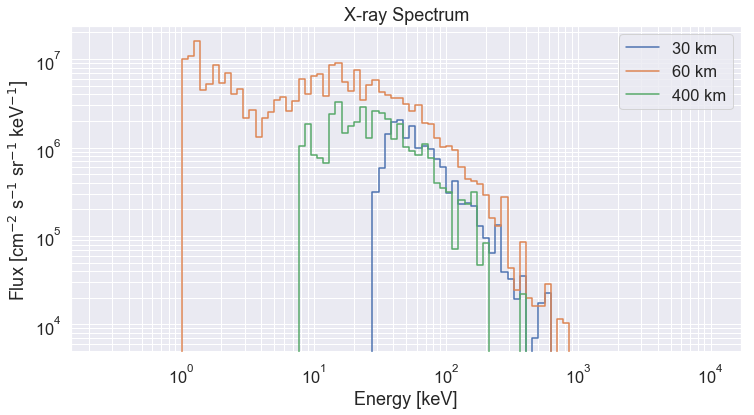

In [3]:
plt.figure(figsize=(12,6))
X.getXraysAtAltitude(energyDist="exp", energy=1000, flux=1e5, altitude=30 );
X.getXraysAtAltitude(energyDist="exp", energy=1000, flux=1e5, altitude=60 );
X.getXraysAtAltitude(energyDist="exp", energy=1000, flux=1e5, altitude=400);
plt.legend();

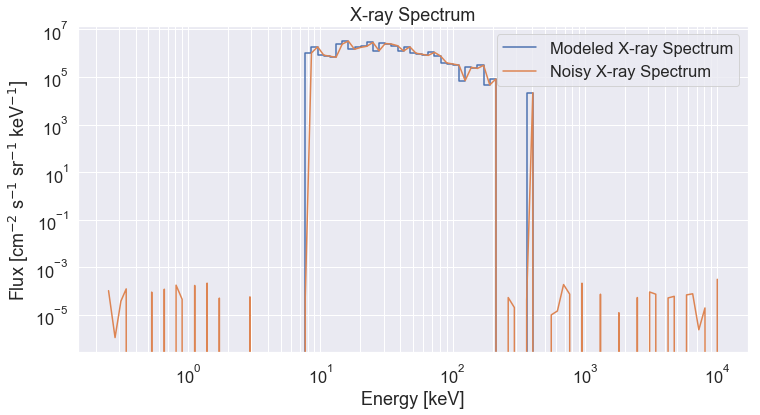

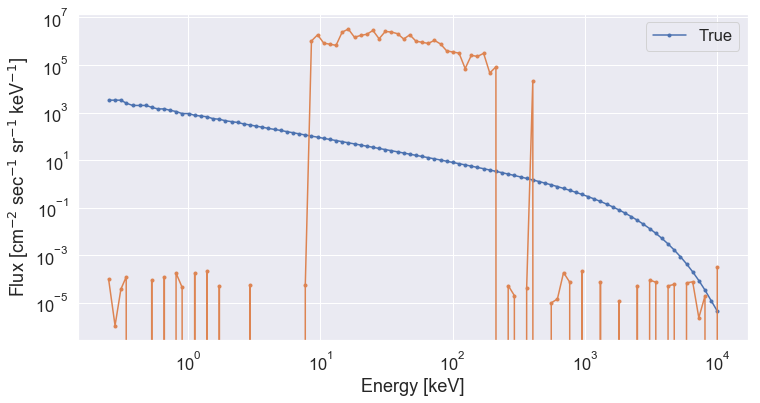

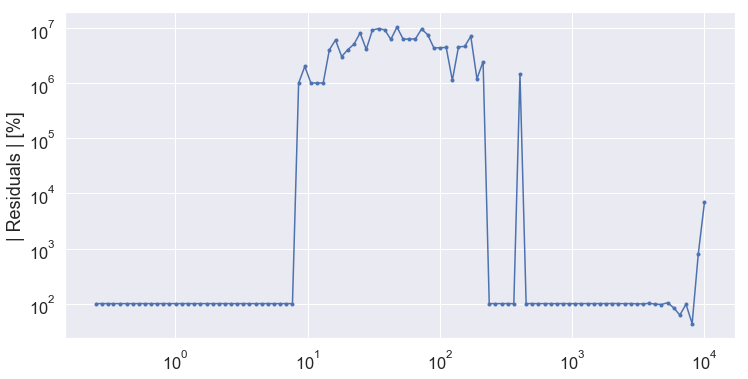

In [4]:
import numpy as np
from G4EPP import api

char_energy = 1000  # keV
flux        = 1e5   # cm^-2 sec^-1 sr^-1

plt.figure(figsize=(12,6))
# Get an example spectrum with known characteristic energy and flux
spectrum = X.getXraysAtAltitude(energyDist="exp", energy=char_energy, flux=flux, altitude=400)

# Add noise to confuse the algorithm
spectrum += 1e-4 * np.random.randn(len(spectrum))

Earray   = api().get_energy_array()
binWidth = api().get_bin_width()

plt.plot(Earray, spectrum);

plt.legend(["Modeled X-ray Spectrum","Noisy X-ray Spectrum"]);

electron_spectrum_estimate = X.invertToElectronSpectrum(spectrum)


true = flux / char_energy * np.exp(-Earray / char_energy) / binWidth


plt.figure(figsize=(12,6))
plt.loglog(Earray, true, '.-', label="True");
plt.xlabel('Energy [keV]')
plt.ylabel('Flux [cm$^{-2}$ sec$^{-1}$ sr$^{-1}$ keV$^{-1}$]');
plt.legend();

plt.loglog(Earray, electron_spectrum_estimate, '.-', label="Estimate");

plt.figure(figsize=(12,6))
plt.loglog(Earray, 100 * np.abs(true - electron_spectrum_estimate) / true,
           '.-', label="Estimate");
plt.ylabel('| Residuals | [%]');